# 13.1 KMeans算法

# 13.1.2 KMeans算法的简单代码实现

1.构造数据

In [27]:
import numpy as np
data = np.array([[3, 2], [4, 1], [3, 6], [4, 7], [3, 9], [6, 8], [6, 6], [7, 7]])

In [28]:
data

array([[3, 2],
       [4, 1],
       [3, 6],
       [4, 7],
       [3, 9],
       [6, 8],
       [6, 6],
       [7, 7]])

2.可视化展示

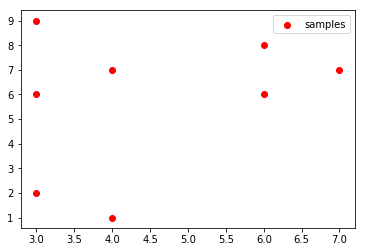

In [29]:
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c="red", marker='o', label='samples')  # 以红色圆圈样式绘制散点图并加上标签
plt.legend()  # 设置图例，图例内容为上面设置的label参数
plt.show()

In [30]:
# plt.scatter?  # 如果想查看scatter的官方说明，可以在其plt.scatter后面加上?进行查看

3.KMeans聚类（聚类成2类）

In [31]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=2)
kms.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
# KMeans?  # 如果想查看KMeans的官方说明，可以在其KMeans后面加上?进行查看

4.获取结果

In [33]:
label = kms.labels_
print(label)

[0 0 1 1 1 1 1 1]


5.结果可视化

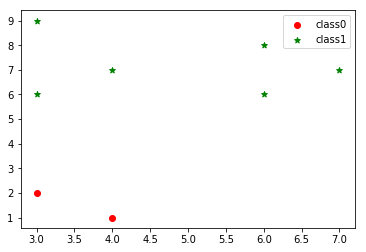

In [34]:
plt.scatter(data[label == 0][:, 0], data[label == 0][:, 1], c="red", marker='o', label='class0')  # 以红色圆圈样式绘制散点图并加上标签
plt.scatter(data[label == 1][:, 0], data[label == 1][:, 1], c="green", marker='*', label='class1')  # 以绿色星星样式绘制散点图并加上标签
plt.legend()  # 设置图例

6.聚类成3类，并可视化呈现

In [35]:
kms_3 = KMeans(n_clusters=3)
kms_3.fit(data)
label_3 = kms_3.labels_
print(label_3)

[1 1 0 0 0 2 2 2]


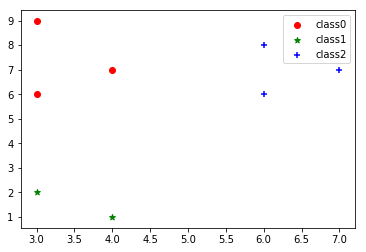

In [36]:
plt.scatter(data[label_3 == 0][:, 0], data[label_3 == 0][:, 1], c="red", marker='o', label='class0')  # 以红色圆圈样式绘制散点图并加上标签
plt.scatter(data[label_3 == 1][:, 0], data[label_3 == 1][:, 1], c="green", marker='*', label='class1')  # 以绿色星星样式绘制散点图并加上标签
plt.scatter(data[label_3 == 2][:, 0], data[label_3 == 2][:, 1], c="blue", marker='+', label='class2')  # 以蓝色加号样式绘制散点图并加上标签
plt.legend()  # 设置图例

# 13.1.3 案例实战 - 银行客户分群模型

1.读取数据

In [37]:
import pandas as pd 
data = pd.read_excel('客户信息.xlsx')
data.head()

,年龄(岁),收入(万元)
0,50,66
1,44,51
2,30,56
3,46,50
4,32,50


2.可视化展示

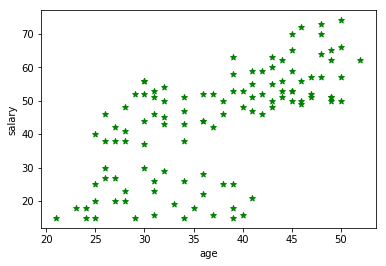

In [38]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c="green", marker='*')  # 以绿色星星样式绘制散点图
plt.xlabel('age')  # 添加x轴名称
plt.ylabel('salary')  # 添加y轴名称
plt.show()

3.数据建模

In [39]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=3, random_state=123)
kms.fit(data)
label = kms.labels_
label = kms.fit_predict(data)

In [40]:
print(label)

[1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 1 1 1 2 2 1 2 1 2 2 2 0 2
 1 2 0 1 1 2 1 2 1 2 1 1 2 2 0 1 2 1 1 1 1 2 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 2 1 2 0 0 0 0 0 0
 2]


4.建模效果可视化展示

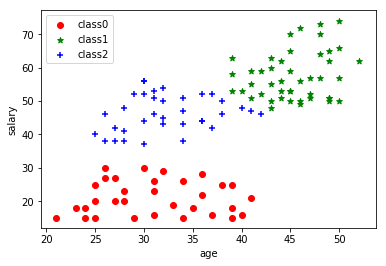

In [41]:
plt.scatter(data[label == 0].iloc[:, 0], data[label == 0].iloc[:, 1], c="red", marker='o', label='class0')  # 以红色圆圈样式绘制散点图并加上标签  
plt.scatter(data[label == 1].iloc[:, 0], data[label == 1].iloc[:, 1], c="green", marker='*', label='class1')  # 以绿色星星样式绘制散点图并加上标签 
plt.scatter(data[label == 2].iloc[:, 0], data[label == 2].iloc[:, 1], c="blue", marker='+', label='class2')  # 以蓝色加号样式绘制散点图并加上标签
plt.xlabel('age')  # 添加x轴名称
plt.ylabel('salary')  # 添加y轴名称
plt.legend()  # 设置图例

5.补充知识点，查看各标签人的收入均值

In [42]:
print(data[label == 0].iloc[:, 1].mean())  # 看下分类为标签0的人的收入均值，iloc[:, 1]为data表格的第二列，也即“收入”列
print(data[label == 1].iloc[:, 1].mean())
print(data[label == 2].iloc[:, 1].mean())

21.125
57.55555555555556
46.285714285714285
